# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [2]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-12-17 23:29:14--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   171MB/s    in 0.5s    

2024-12-17 23:29:14 (171 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py3

## **Load bioactivity data**

In [8]:
! wget https://raw.githubusercontent.com/VictoriaLiendro/drug-analysis-tutorial/refs/heads/main/data/erbB1_03_bioactivity_data_curated.csv

--2024-12-17 23:36:22--  https://raw.githubusercontent.com/VictoriaLiendro/drug-analysis-tutorial/refs/heads/main/data/erbB1_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6153 (6.0K) [text/plain]
Saving to: ‘erbB1_03_bioactivity_data_curated.csv’

erbB1_03_bioactivit 100%[===================>]   6.01K  --.-KB/s    in 0s      

2024-12-17 23:36:22 (52.8 MB/s) - ‘erbB1_03_bioactivity_data_curated.csv’ saved [6153/6153]



In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('erbB1_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL292323,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,100000.00,inactive
1,CHEMBL304414,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,100000.00,inactive
2,CHEMBL62176,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,100000.00,inactive
3,CHEMBL62701,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,25000.00,inactive
4,CHEMBL137617,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,70.00,active
...,...,...,...,...
76,CHEMBL5430172,CN(C(=O)Nc1ccccn1)C1CCCC1,794328.23,inactive
77,CHEMBL5411911,CN(C(=O)N(C)C1CCCC1)c1ccccc1,125892.54,inactive
78,CHEMBL5420832,CN(C(=O)N(C)C1CCCC1)c1ccccn1,1000000.00,inactive
79,CHEMBL5424516,COc1cc2ncnc(NCc3ccc(NC(=O)C(c4ccccc4)N4Cc5cccc...,1450.00,intermediate


In [11]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [17]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [18]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL292323,100000.00,inactive,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...
1,CHEMBL304414,100000.00,inactive,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...
2,CHEMBL62176,100000.00,inactive,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21
3,CHEMBL62701,25000.00,inactive,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...
4,CHEMBL137617,70.00,active,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1
...,...,...,...,...
76,CHEMBL5430172,794328.23,inactive,CN(C(=O)Nc1ccccn1)C1CCCC1
77,CHEMBL5411911,125892.54,inactive,CN(C(=O)N(C)C1CCCC1)c1ccccc1
78,CHEMBL5420832,1000000.00,inactive,CN(C(=O)N(C)C1CCCC1)c1ccccn1
79,CHEMBL5424516,1450.00,intermediate,COc1cc2ncnc(NCc3ccc(NC(=O)C(c4ccccc4)N4Cc5cccc...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [13]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.4 MB/s 


In [14]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [15]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [19]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,622.772,7.9912,2.0,8.0
1,562.720,7.9740,2.0,6.0
2,282.368,3.1861,1.0,2.0
3,564.696,6.7640,2.0,8.0
4,357.215,4.5448,2.0,5.0
...,...,...,...,...
76,219.288,2.4879,1.0,2.0
77,232.327,3.1172,0.0,1.0
78,233.315,2.5122,0.0,2.0
79,672.786,5.6874,2.0,9.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [20]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,622.772,7.9912,2.0,8.0
1,562.720,7.9740,2.0,6.0
2,282.368,3.1861,1.0,2.0
3,564.696,6.7640,2.0,8.0
4,357.215,4.5448,2.0,5.0
...,...,...,...,...
76,219.288,2.4879,1.0,2.0
77,232.327,3.1172,0.0,1.0
78,233.315,2.5122,0.0,2.0
79,672.786,5.6874,2.0,9.0


In [21]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL292323,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,100000.00,inactive
1,CHEMBL304414,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,100000.00,inactive
2,CHEMBL62176,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,100000.00,inactive
3,CHEMBL62701,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,25000.00,inactive
4,CHEMBL137617,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,70.00,active
...,...,...,...,...
76,CHEMBL5430172,CN(C(=O)Nc1ccccn1)C1CCCC1,794328.23,inactive
77,CHEMBL5411911,CN(C(=O)N(C)C1CCCC1)c1ccccc1,125892.54,inactive
78,CHEMBL5420832,CN(C(=O)N(C)C1CCCC1)c1ccccn1,1000000.00,inactive
79,CHEMBL5424516,COc1cc2ncnc(NCc3ccc(NC(=O)C(c4ccccc4)N4Cc5cccc...,1450.00,intermediate


Now, let's combine the 2 DataFrame

In [22]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [23]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL292323,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,100000.00,inactive,622.772,7.9912,2.0,8.0
1,CHEMBL304414,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,100000.00,inactive,562.720,7.9740,2.0,6.0
2,CHEMBL62176,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,100000.00,inactive,282.368,3.1861,1.0,2.0
3,CHEMBL62701,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,25000.00,inactive,564.696,6.7640,2.0,8.0
4,CHEMBL137617,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,70.00,active,357.215,4.5448,2.0,5.0
...,...,...,...,...,...,...,...,...
76,CHEMBL5430172,CN(C(=O)Nc1ccccn1)C1CCCC1,794328.23,inactive,219.288,2.4879,1.0,2.0
77,CHEMBL5411911,CN(C(=O)N(C)C1CCCC1)c1ccccc1,125892.54,inactive,232.327,3.1172,0.0,1.0
78,CHEMBL5420832,CN(C(=O)N(C)C1CCCC1)c1ccccn1,1000000.00,inactive,233.315,2.5122,0.0,2.0
79,CHEMBL5424516,COc1cc2ncnc(NCc3ccc(NC(=O)C(c4ccccc4)N4Cc5cccc...,1450.00,intermediate,672.786,5.6874,2.0,9.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [42]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [43]:
df_combined.standard_value.describe()

,standard_value
count,81.000000
mean,82997.568153
std,216340.990026
min,0.004400
25%,158.490000
50%,10000.000000
75%,36900.000000
max,1000000.000000


In [26]:
-np.log10( (10**-9)* 100000000 )

1.0

In [27]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [37]:
def norm_value(input): #to cap the values so we will not have negative values
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [38]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL292323,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,inactive,622.772,7.9912,2.0,8.0,100000.00
1,CHEMBL304414,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,inactive,562.720,7.9740,2.0,6.0,100000.00
2,CHEMBL62176,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,inactive,282.368,3.1861,1.0,2.0,100000.00
3,CHEMBL62701,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,inactive,564.696,6.7640,2.0,8.0,25000.00
4,CHEMBL137617,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,active,357.215,4.5448,2.0,5.0,70.00
...,...,...,...,...,...,...,...,...
76,CHEMBL5430172,CN(C(=O)Nc1ccccn1)C1CCCC1,inactive,219.288,2.4879,1.0,2.0,794328.23
77,CHEMBL5411911,CN(C(=O)N(C)C1CCCC1)c1ccccc1,inactive,232.327,3.1172,0.0,1.0,125892.54
78,CHEMBL5420832,CN(C(=O)N(C)C1CCCC1)c1ccccn1,inactive,233.315,2.5122,0.0,2.0,1000000.00
79,CHEMBL5424516,COc1cc2ncnc(NCc3ccc(NC(=O)C(c4ccccc4)N4Cc5cccc...,intermediate,672.786,5.6874,2.0,9.0,1450.00


In [44]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,81.000000
mean,82997.568153
std,216340.990026
min,0.004400
25%,158.490000
50%,10000.000000
75%,36900.000000
max,1000000.000000


In [45]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL292323,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,inactive,622.772,7.9912,2.0,8.0,4.000000
1,CHEMBL304414,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,inactive,562.720,7.9740,2.0,6.0,4.000000
2,CHEMBL62176,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,inactive,282.368,3.1861,1.0,2.0,4.000000
3,CHEMBL62701,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,inactive,564.696,6.7640,2.0,8.0,4.602060
4,CHEMBL137617,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,active,357.215,4.5448,2.0,5.0,7.154902
...,...,...,...,...,...,...,...,...
76,CHEMBL5430172,CN(C(=O)Nc1ccccn1)C1CCCC1,inactive,219.288,2.4879,1.0,2.0,3.100000
77,CHEMBL5411911,CN(C(=O)N(C)C1CCCC1)c1ccccc1,inactive,232.327,3.1172,0.0,1.0,3.900000
78,CHEMBL5420832,CN(C(=O)N(C)C1CCCC1)c1ccccn1,inactive,233.315,2.5122,0.0,2.0,3.000000
79,CHEMBL5424516,COc1cc2ncnc(NCc3ccc(NC(=O)C(c4ccccc4)N4Cc5cccc...,intermediate,672.786,5.6874,2.0,9.0,5.838632


In [46]:
df_final.pIC50.describe()

,pIC50
count,81.000000
mean,5.672672
std,1.896794
min,3.000000
25%,4.432974
50%,5.000000
75%,6.799998
max,11.356547


Let's write this to CSV file.

In [47]:
df_final.to_csv('erbB1_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [48]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL292323,COc1cccc2c(C(=O)Nc3ccccc3)c(SSc3c(C(=O)Nc4cccc...,inactive,622.772,7.9912,2.0,8.0,4.000000
1,CHEMBL304414,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3ccccc3n2C)c(C(=O)N...,inactive,562.720,7.9740,2.0,6.0,4.000000
2,CHEMBL62176,CN1C(=S)C(C(=O)Nc2ccccc2)c2ccccc21,inactive,282.368,3.1861,1.0,2.0,4.000000
3,CHEMBL62701,Cn1c(SSc2c(C(=O)Nc3ccccc3)c3cccnc3n2C)c(C(=O)N...,inactive,564.696,6.7640,2.0,8.0,4.602060
4,CHEMBL137617,C/N=N/Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1,active,357.215,4.5448,2.0,5.0,7.154902
...,...,...,...,...,...,...,...,...
75,CHEMBL5401602,CN(C(=O)Nc1ccccc1)C1CCCC1,inactive,218.300,3.0929,1.0,1.0,3.000000
76,CHEMBL5430172,CN(C(=O)Nc1ccccn1)C1CCCC1,inactive,219.288,2.4879,1.0,2.0,3.100000
77,CHEMBL5411911,CN(C(=O)N(C)C1CCCC1)c1ccccc1,inactive,232.327,3.1172,0.0,1.0,3.900000
78,CHEMBL5420832,CN(C(=O)N(C)C1CCCC1)c1ccccn1,inactive,233.315,2.5122,0.0,2.0,3.000000


Let's write this to CSV file.

In [49]:
df_2class.to_csv('erbB1_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [52]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

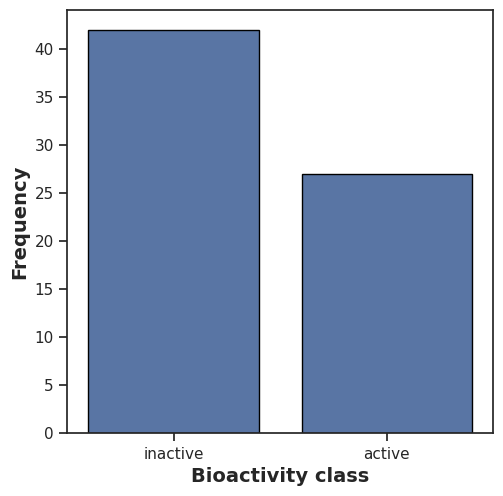

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

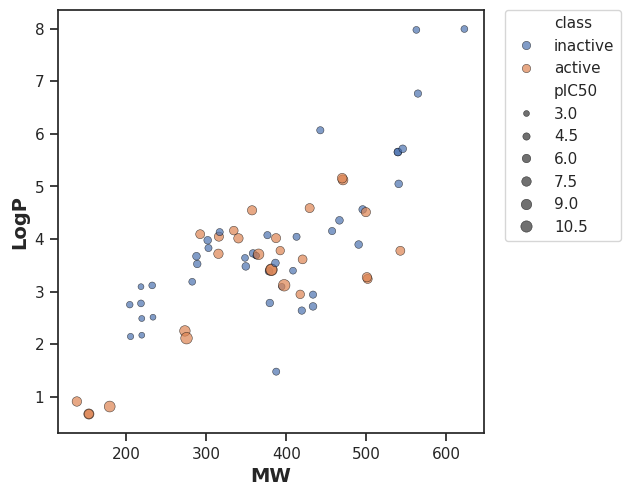

In [54]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

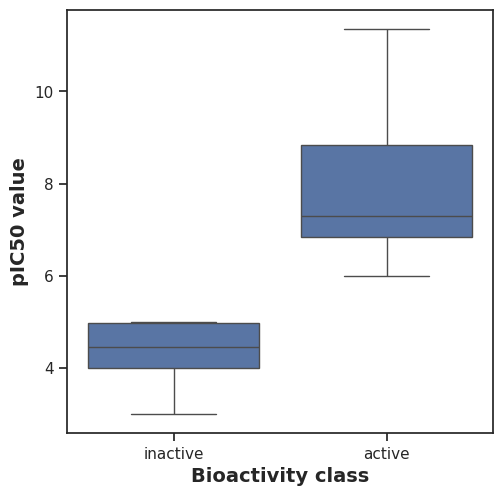

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [56]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [57]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1134.0,2.986340e-12,0.05,Different distribution (reject H0)


#### **MW**

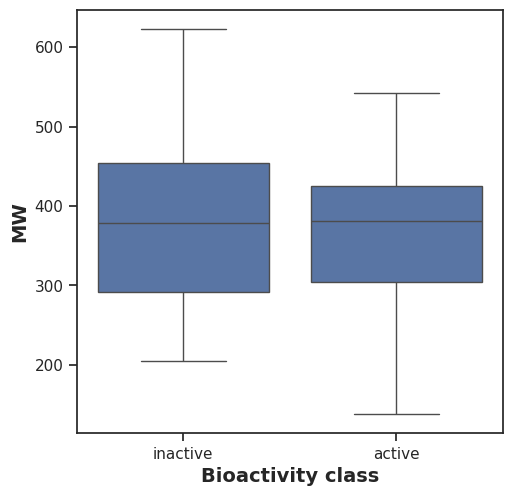

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [59]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,524.0,0.601284,0.05,Same distribution (fail to reject H0)


#### **LogP**

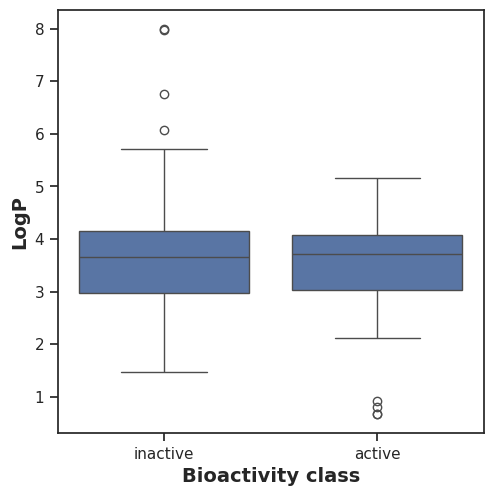

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [61]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,528.0,0.635944,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

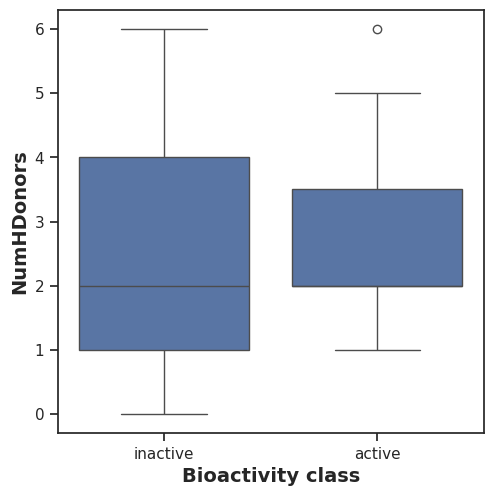

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [63]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,650.5,0.292861,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

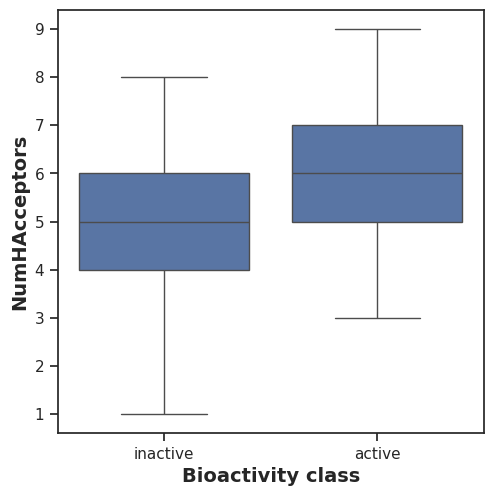

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [65]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,703.5,0.090423,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Ony pIC50 of all of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [70]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: erbB1_03_bioactivity_data_curated.csv (deflated 75%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 18%)
  adding: erbB1_04_bioactivity_data_3class_pIC50.csv (deflated 69%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: erbB1_05_bioactivity_data_2class_pIC50.csv (deflated 69%)
